In [1]:
import numpy as np
import re
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from __future__ import unicode_literals
from collections import Counter
from math import *
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
import eli5
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import classification_report, f1_score,accuracy_score ,confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from collections import Counter
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import IsolationForest
import matplotlib.gridspec as gridspec
from sklearn.impute import KNNImputer
import seaborn as sns
import warnings
from warnings import simplefilter
import ast
simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None  # default='warn'
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)
import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
train_df = pd.read_csv("../input/walmart-recruiting-store-sales-forecasting/train.csv.zip")
test_df = pd.read_csv("../input/walmart-recruiting-store-sales-forecasting/test.csv.zip")
store = pd.read_csv("../input/walmart-recruiting-store-sales-forecasting/stores.csv")
features = pd.read_csv("../input/walmart-recruiting-store-sales-forecasting/features.csv.zip")

In [3]:
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
train_df = train_df.merge(store,how="inner").merge(features,how="inner")
test_df = test_df.merge(store,how="inner").merge(features,how="inner")

In [7]:
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [9]:
train_df.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

In [10]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000
Size,421570.0,136727.915739,60980.583328,34875.000,93638.000000,140167.00000,202505.000000,219622.000000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
MarkDown1,150681.0,7246.420196,8291.221345,0.270,2240.270000,5347.45000,9210.900000,88646.760000
MarkDown2,111248.0,3334.628621,9475.357325,-265.760,41.600000,192.00000,1926.940000,104519.540000
MarkDown3,137091.0,1439.421384,9623.078290,-29.100,5.080000,24.60000,103.990000,141630.610000
MarkDown4,134967.0,3383.168256,6292.384031,0.220,504.220000,1481.31000,3595.040000,67474.850000


In [11]:
train_df.fillna(0,inplace=True)

In [12]:
train_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'],
      dtype='object')

In [13]:
train_df["Store"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [14]:
train_df["Store"].value_counts()

13    10474
10    10315
4     10272
1     10244
2     10238
24    10228
27    10225
34    10224
20    10214
6     10211
32    10202
19    10148
31    10142
28    10113
41    10088
11    10062
23    10050
14    10040
40    10017
15     9901
8      9895
39     9878
17     9864
18     9859
26     9854
25     9804
7      9762
12     9705
22     9688
45     9637
21     9582
35     9528
29     9455
16     9443
3      9036
5      8999
9      8867
38     7362
37     7206
44     7169
30     7156
42     6953
43     6751
33     6487
36     6222
Name: Store, dtype: int64

In [15]:
train_df["Dept"].nunique()

81

In [16]:
np.sort(train_df["Dept"].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       54, 55, 56, 58, 59, 60, 65, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82,
       83, 85, 87, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [17]:
train_df["Date"] = pd.to_datetime(train_df["Date"])

In [18]:
train_df["IsHoliday"].unique()

array([False,  True])

In [19]:
train_df["Type"].unique()

array(['A', 'B', 'C'], dtype=object)

In [20]:
train_df["Day"] = train_df["Date"].dt.day
train_df["Month"] = train_df["Date"].dt.month
train_df["Year"] = train_df["Date"].dt.year
train_df.drop("Date",axis=1,inplace=True)

In [21]:
# Super Bowl
train_df.loc[(train_df["Day"] == 12) & (train_df["Month"] == 2) & (train_df["Year"] == 2010) , "IsHoliday"] = True
train_df.loc[(train_df["Day"] == 11) & (train_df["Month"] == 2) & (train_df["Year"] == 2011) , "IsHoliday"] = True
train_df.loc[(train_df["Day"] == 10) & (train_df["Month"] == 2) & (train_df["Year"] == 2012) , "IsHoliday"] = True
train_df.loc[(train_df["Day"] == 8) & (train_df["Month"] == 2) & (train_df["Year"] == 2013) , "IsHoliday"] = True
# Labor Day
train_df.loc[(train_df["Day"] == 10) & (train_df["Month"] == 9) & (train_df["Year"] == 2010) , "IsHoliday"] = True
train_df.loc[(train_df["Day"] == 9) & (train_df["Month"] == 9) & (train_df["Year"] == 2011) , "IsHoliday"] = True
train_df.loc[(train_df["Day"] == 7) & (train_df["Month"] == 9) & (train_df["Year"] == 2012) , "IsHoliday"] = True
train_df.loc[(train_df["Day"] == 6) & (train_df["Month"] == 9) & (train_df["Year"] == 2013) , "IsHoliday"] = True

# Thanksgiving
train_df.loc[(train_df["Day"] == 26) & (train_df["Month"] == 11) & (train_df["Year"] == 2010) , "IsHoliday"] = True
train_df.loc[(train_df["Day"] == 25) & (train_df["Month"] == 11) & (train_df["Year"] == 2011) , "IsHoliday"] = True
train_df.loc[(train_df["Day"] == 23) & (train_df["Month"] == 11) & (train_df["Year"] == 2012) , "IsHoliday"] = True
train_df.loc[(train_df["Day"] == 29) & (train_df["Month"] == 11) & (train_df["Year"] == 2013) , "IsHoliday"] = True

# Christmas
train_df.loc[(train_df["Day"] == 31) & (train_df["Month"] == 12) & (train_df["Year"] == 2010) , "IsHoliday"] = True
train_df.loc[(train_df["Day"] == 30) & (train_df["Month"] == 12) & (train_df["Year"] == 2011) , "IsHoliday"] = True
train_df.loc[(train_df["Day"] == 28) & (train_df["Month"] == 12) & (train_df["Year"] == 2012) , "IsHoliday"] = True
train_df.loc[(train_df["Day"] == 27) & (train_df["Month"] == 12) & (train_df["Year"] == 2013) , "IsHoliday"] = True


In [22]:
train_df["Sum_of_MarkDown"] = train_df["MarkDown1"] + train_df["MarkDown2"] +train_df["MarkDown3"] +train_df["MarkDown4"] +train_df["MarkDown5"] 

In [23]:
train_df.head()

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Day,Month,Year,Sum_of_MarkDown
0,1,1,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,5,2,2010,0.0
1,1,2,50605.27,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,5,2,2010,0.0
2,1,3,13740.12,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,5,2,2010,0.0
3,1,4,39954.04,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,5,2,2010,0.0
4,1,5,32229.38,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,5,2,2010,0.0


In [24]:
train_df.shape

(421570, 19)

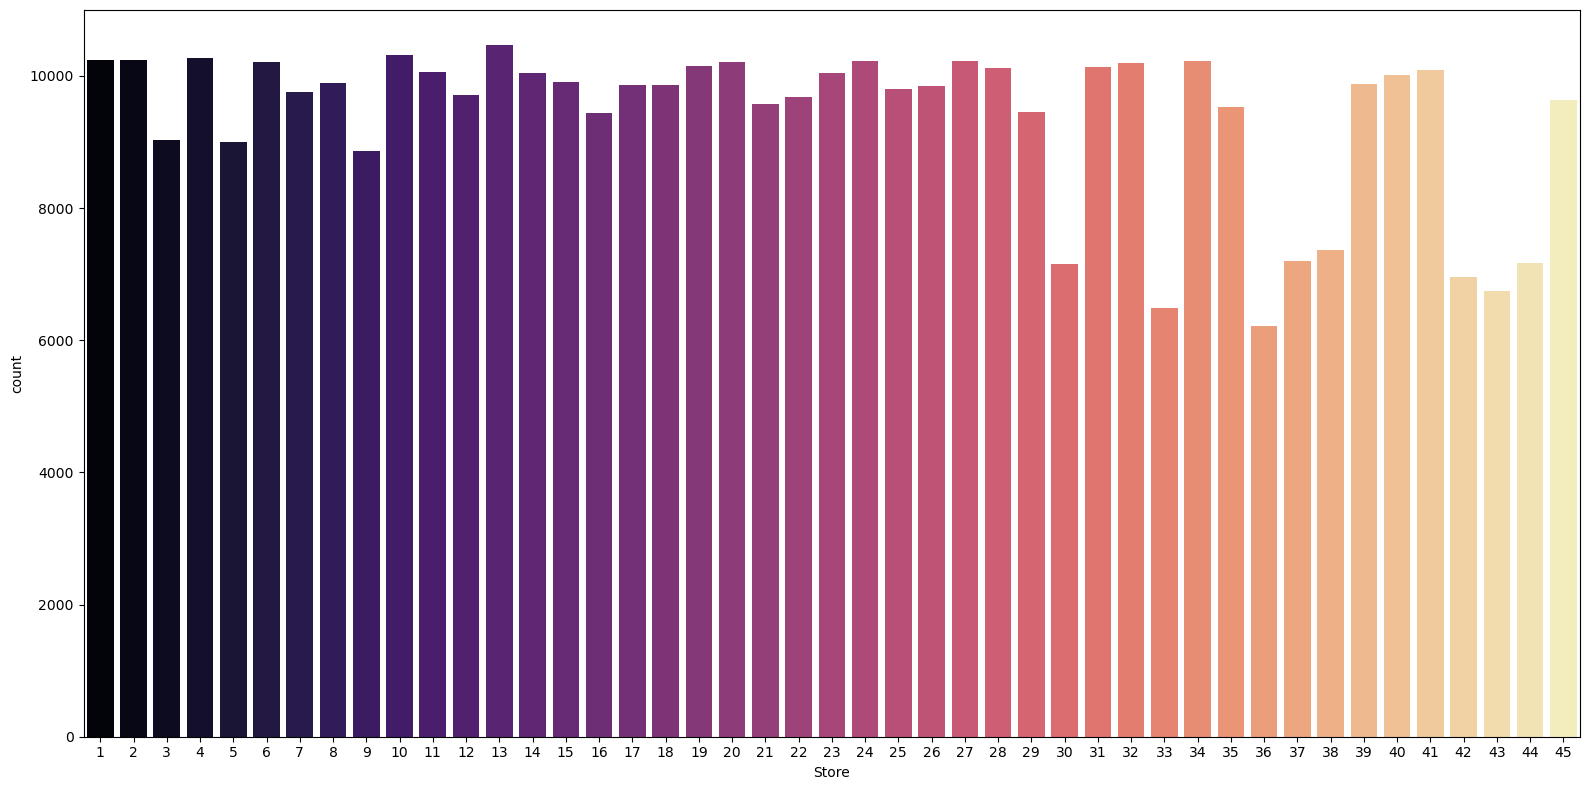

In [25]:
plt.figure(figsize=(16,8))
sns.countplot(x=train_df["Store"],palette="magma")
plt.tight_layout()

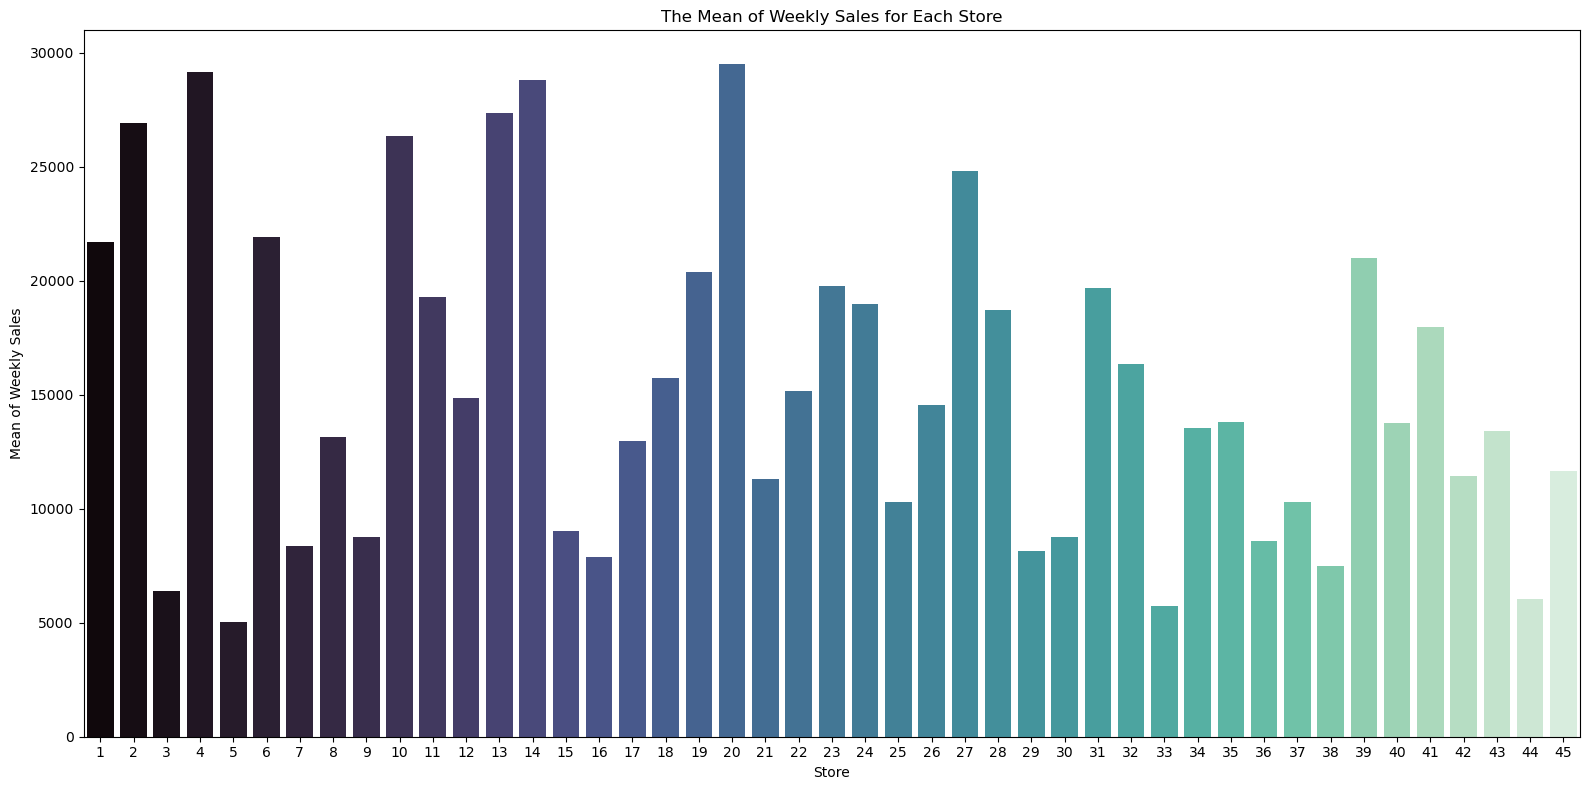

In [26]:
plt.figure(figsize=(16,8))
store_df = train_df.groupby("Store")["Weekly_Sales"].mean().to_frame().reset_index()
sns.barplot(x=store_df["Store"],y=store_df["Weekly_Sales"],palette="mako")
plt.ylabel("Mean of Weekly Sales")
plt.title("The Mean of Weekly Sales for Each Store")
plt.tight_layout()

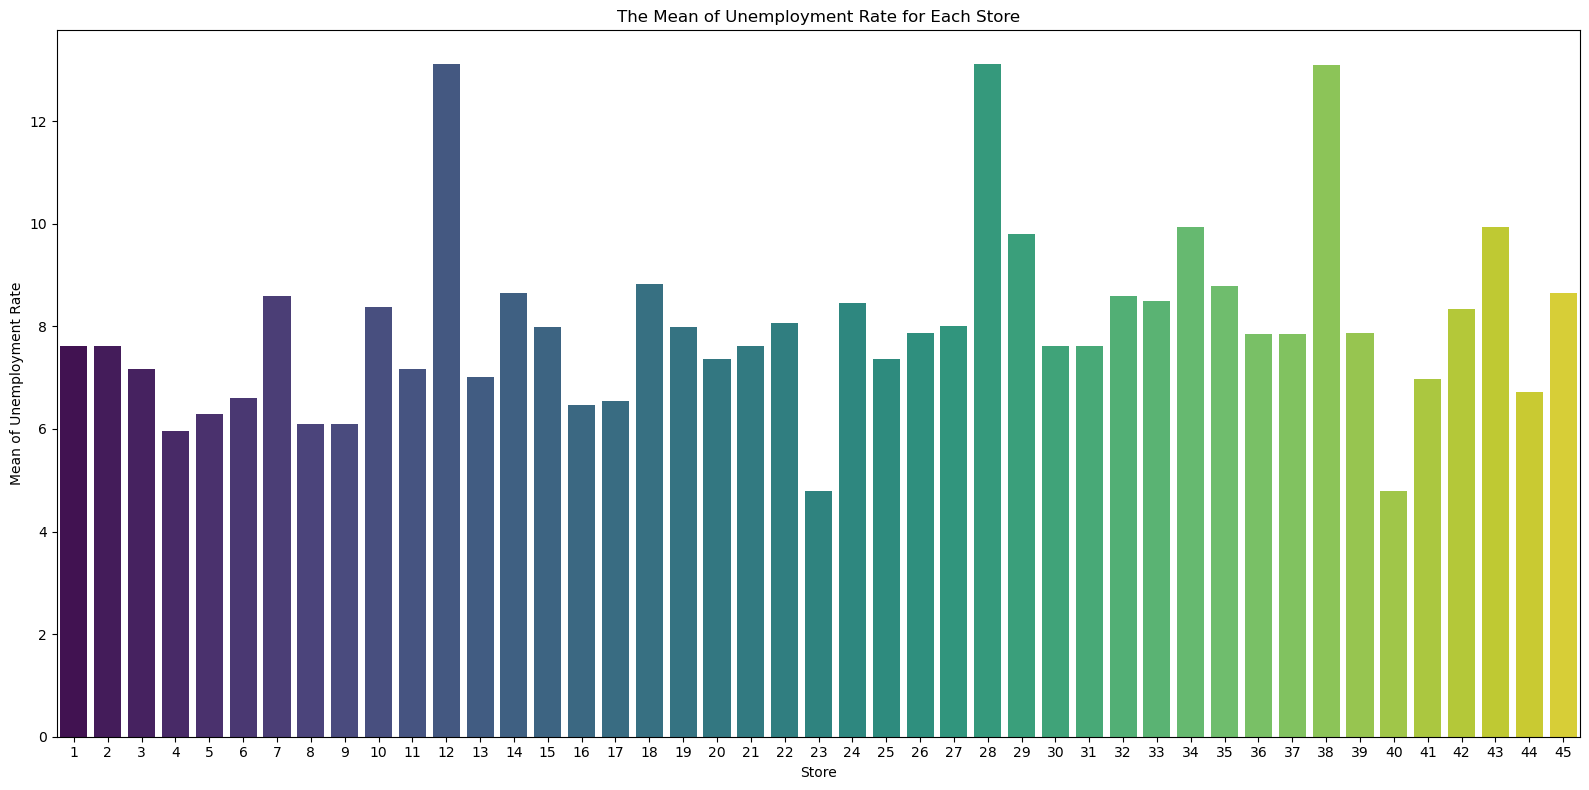

In [27]:
plt.figure(figsize=(16,8))
store_df2 = train_df.groupby("Store")["Unemployment"].mean().to_frame().reset_index()
sns.barplot(x=store_df2["Store"],y=store_df2["Unemployment"],palette="viridis")
plt.ylabel("Mean of Unemployment Rate")
plt.title("The Mean of Unemployment Rate for Each Store")
plt.tight_layout()

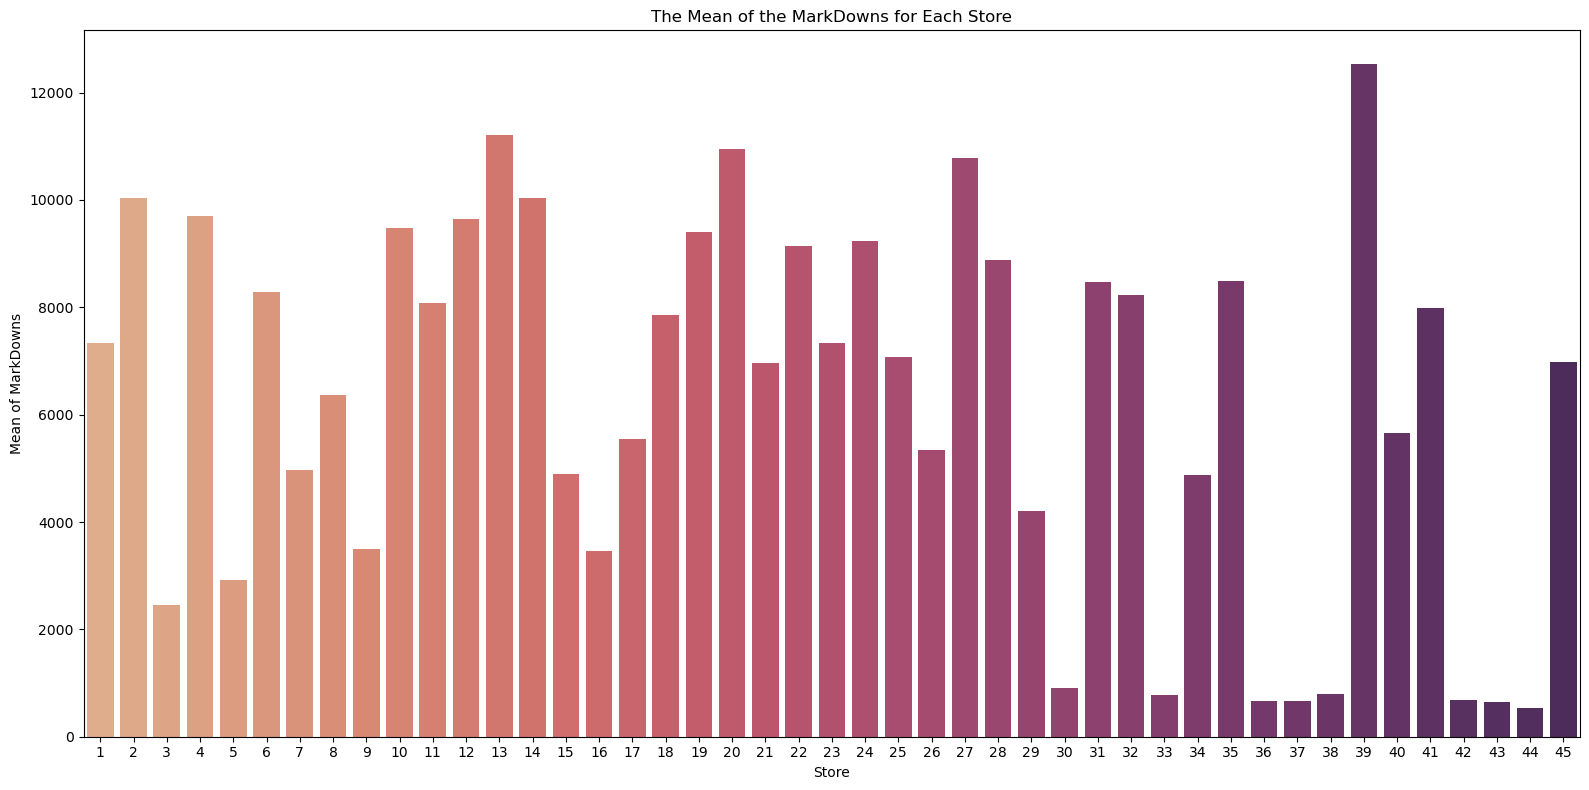

In [28]:
plt.figure(figsize=(16,8))
store_df3 = train_df.groupby("Store")["Sum_of_MarkDown"].mean().to_frame().reset_index()
sns.barplot(x=store_df3["Store"],y=store_df3["Sum_of_MarkDown"],palette="flare")
plt.ylabel("Mean of MarkDowns")
plt.title("The Mean of the MarkDowns for Each Store")
plt.tight_layout()

/tmp/ipykernel_32/2375130118.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=train_df["Dept"])


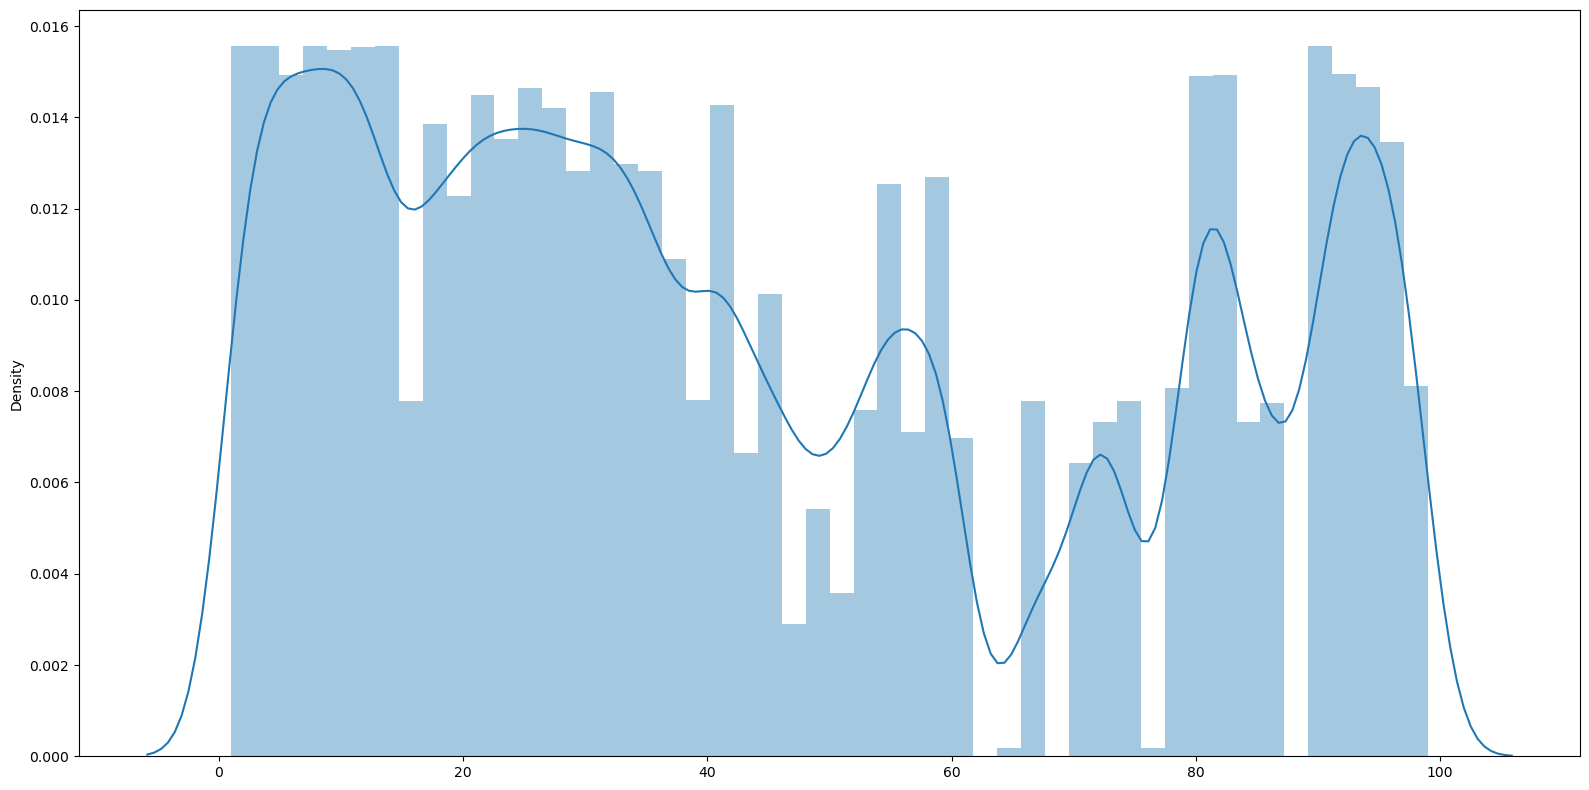

In [29]:
plt.figure(figsize=(16,8))
sns.distplot(x=train_df["Dept"])
plt.tight_layout()

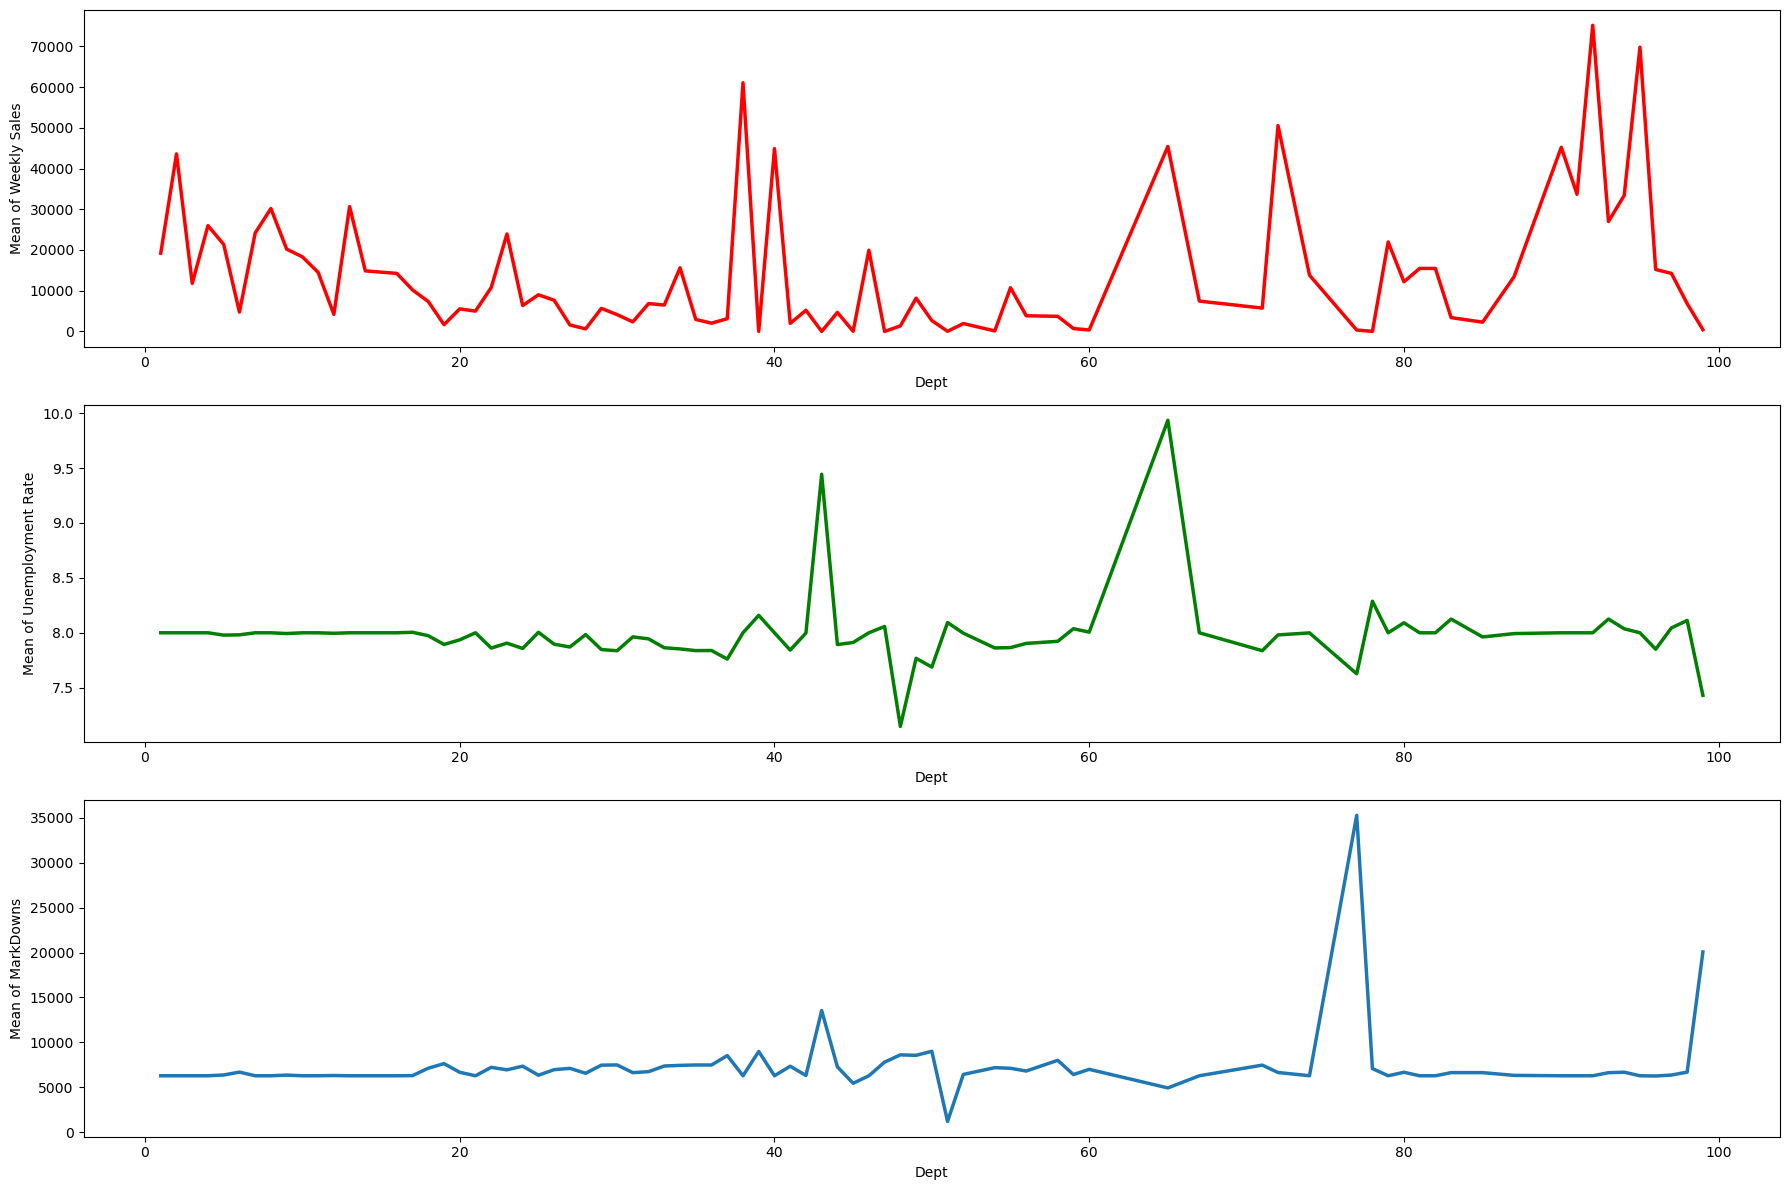

In [30]:
Dept_df = train_df.groupby("Dept")[["Sum_of_MarkDown","Unemployment","Weekly_Sales"]].mean().reset_index()
fig , ax = plt.subplots(3,1,figsize = (18,12))
ax1 = sns.lineplot(x=Dept_df["Dept"],y=Dept_df["Sum_of_MarkDown"],ax=ax[2],linewidth=2.5)
ax1.set_ylabel("Mean of MarkDowns")
ax2 = sns.lineplot(x=Dept_df["Dept"],y=Dept_df["Unemployment"],ax=ax[1],linewidth=2.5,color = "g")
ax2.set_ylabel("Mean of Unemployment Rate")
ax3 = sns.lineplot(x=Dept_df["Dept"],y=Dept_df["Weekly_Sales"],ax=ax[0],linewidth=2.5,color = "r")
ax3.set_ylabel("Mean of Weekly Sales")
plt.tight_layout()

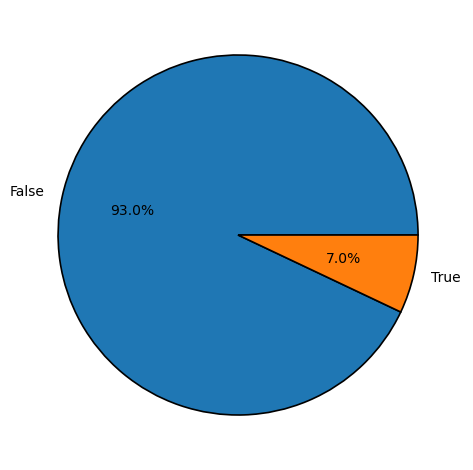

In [31]:
is_holi = dict(train_df["IsHoliday"].value_counts())
plt.pie(is_holi.values(),labels=is_holi.keys(),wedgeprops={"edgecolor":"black","linewidth":1.2},autopct="%1.1f%%")
plt.tight_layout()

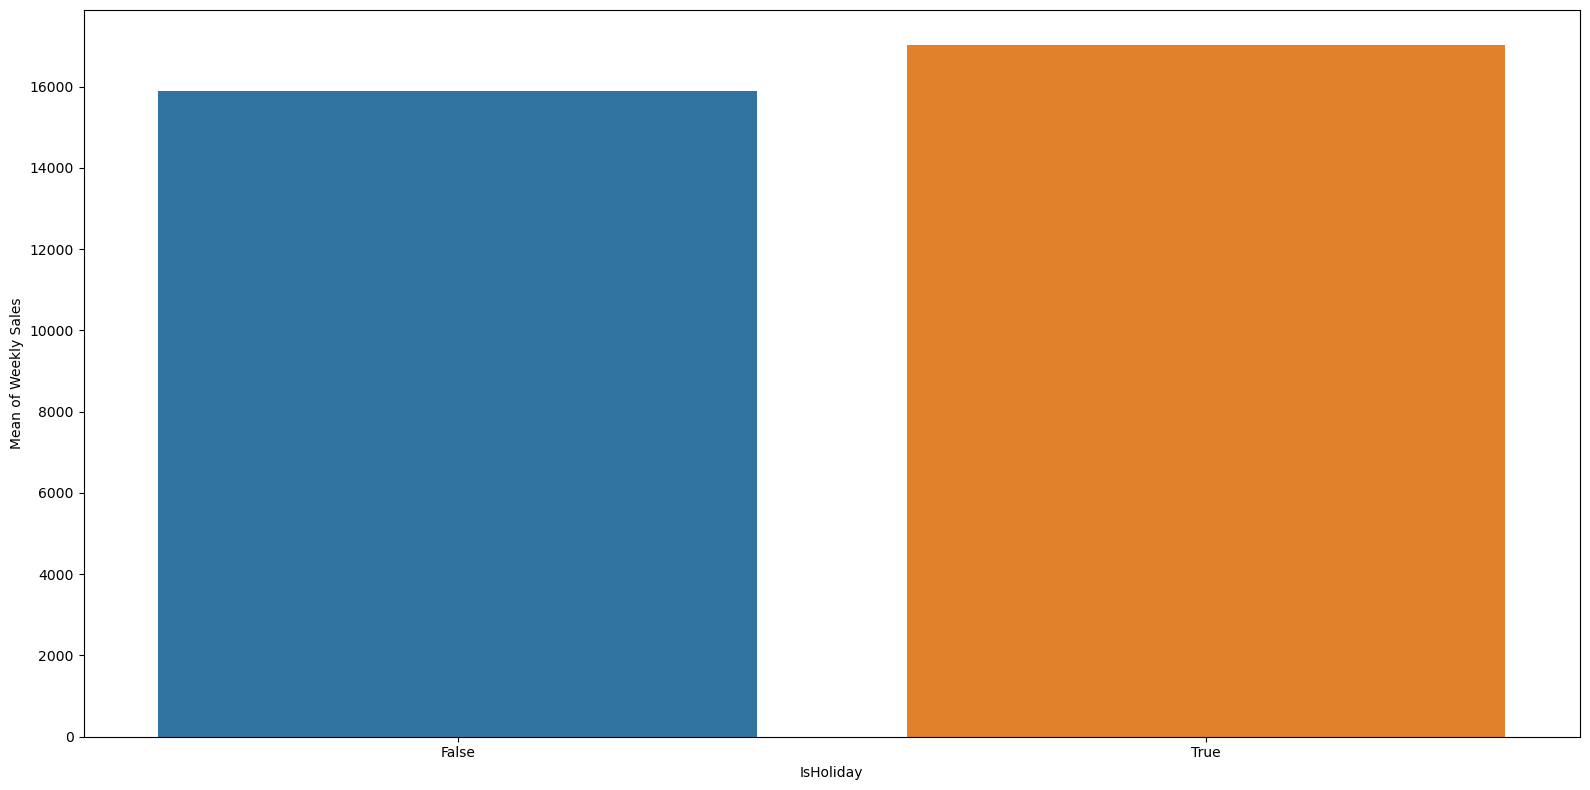

In [32]:
IsHoliday = train_df.groupby("IsHoliday")["Weekly_Sales"].mean().to_frame().reset_index()
plt.figure(figsize=(16,8))
sns.barplot(x=IsHoliday["IsHoliday"],y=IsHoliday["Weekly_Sales"])
plt.ylabel("Mean of Weekly Sales")
plt.tight_layout()

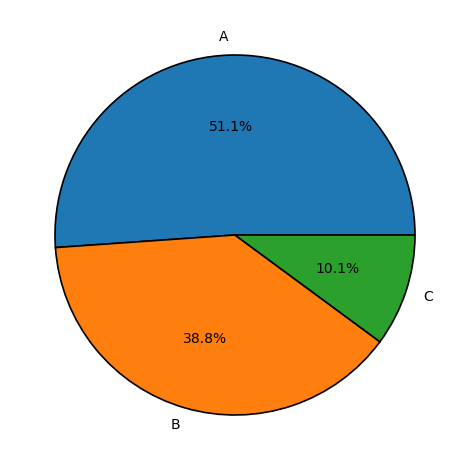

In [33]:
Type_dict = dict(train_df["Type"].value_counts())
plt.pie(Type_dict.values(),labels=Type_dict.keys(),wedgeprops={"edgecolor":"black","linewidth":1.2},autopct="%1.1f%%")
plt.tight_layout()

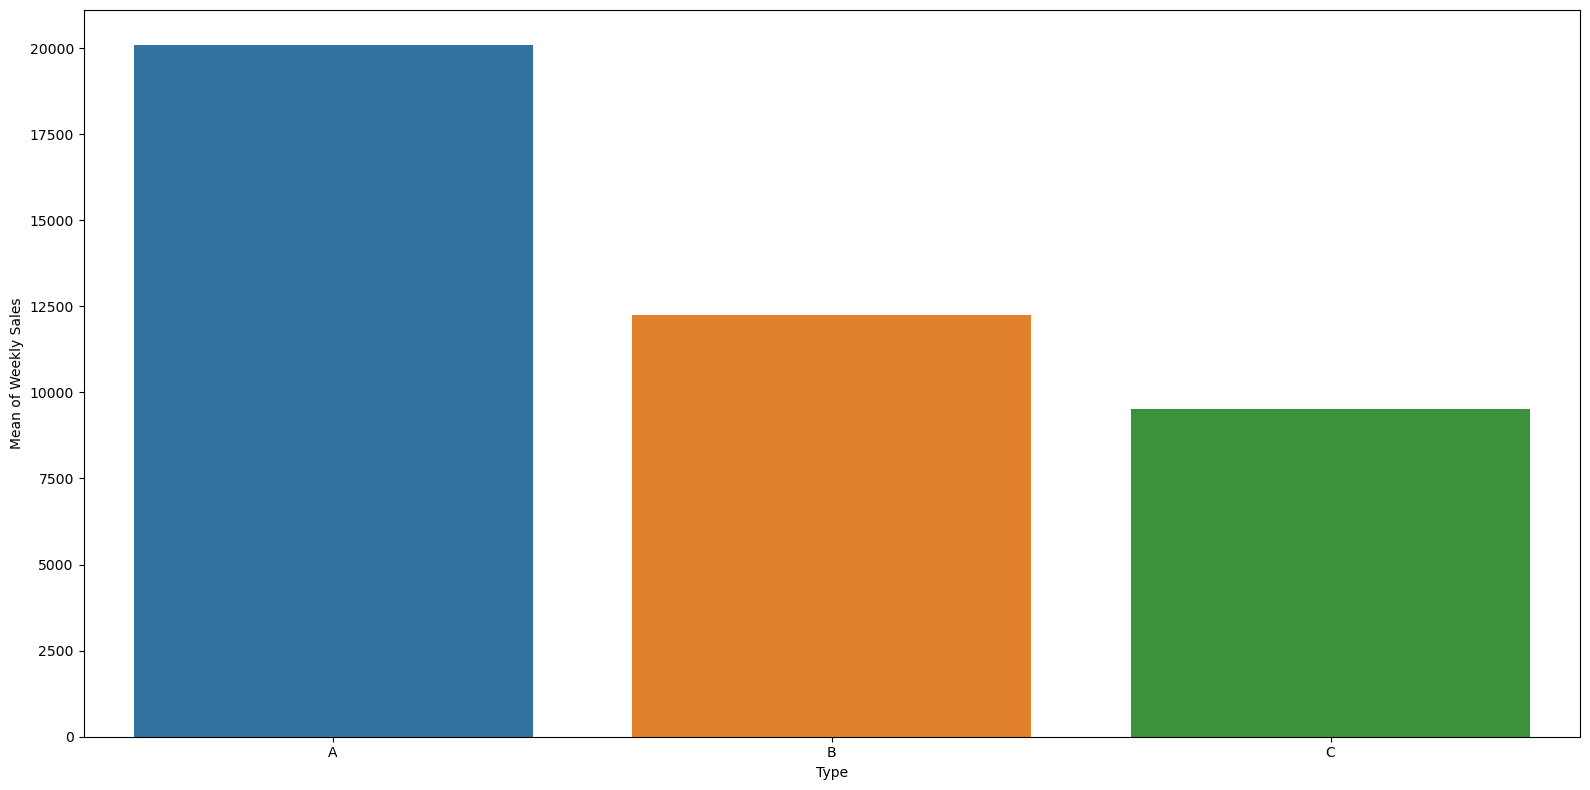

In [34]:
Type = train_df.groupby("Type")["Weekly_Sales"].mean().to_frame().reset_index()
plt.figure(figsize=(16,8))
sns.barplot(x=Type["Type"],y=Type["Weekly_Sales"])
plt.ylabel("Mean of Weekly Sales")
plt.tight_layout()

/tmp/ipykernel_32/201051756.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=train_df["Size"])


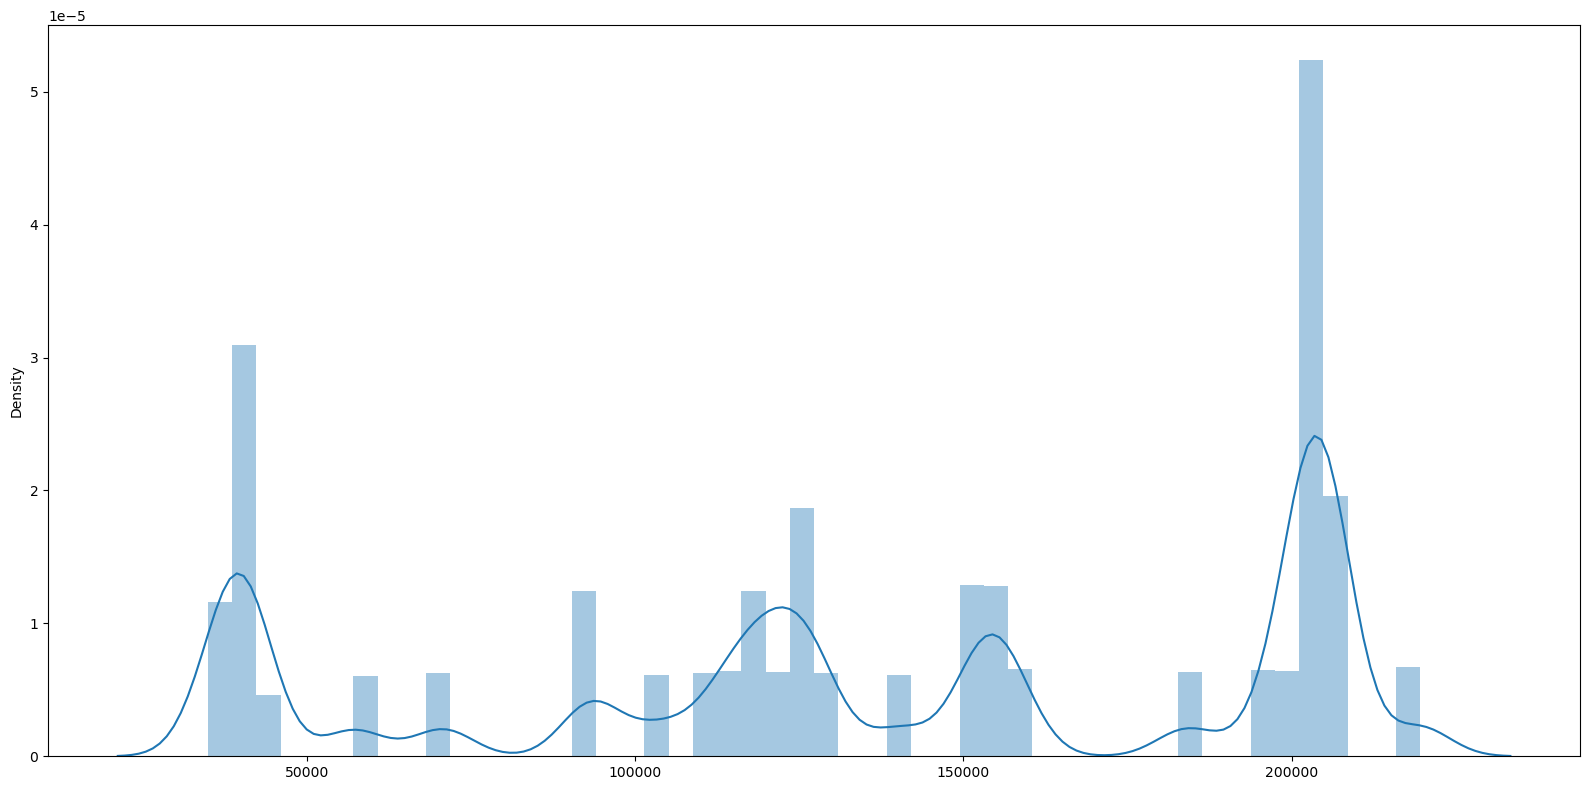

In [35]:
plt.figure(figsize=(16,8))
sns.distplot(x=train_df["Size"])
plt.tight_layout()

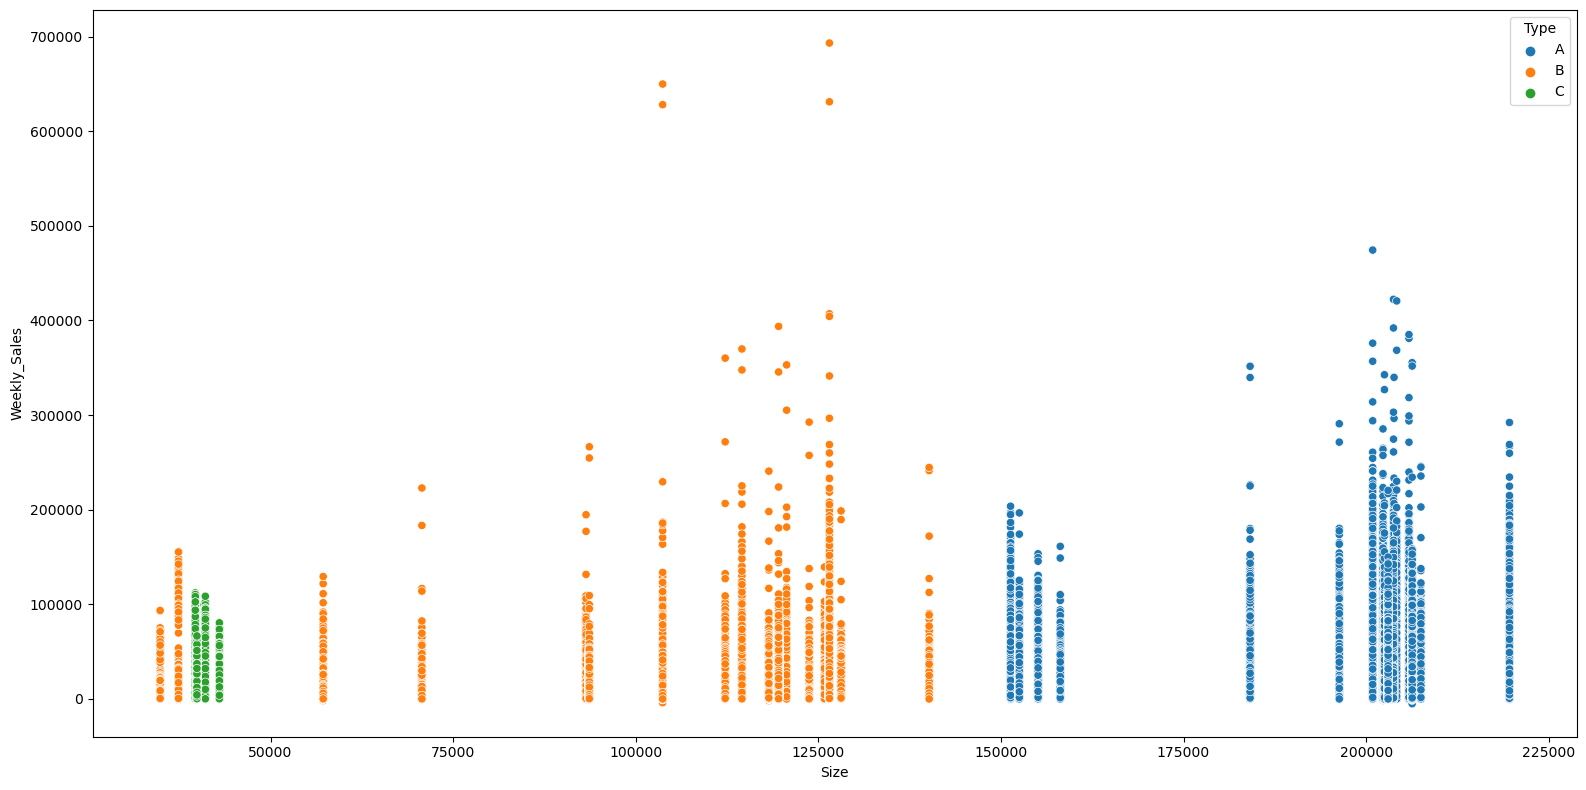

In [36]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=train_df["Size"],y=train_df["Weekly_Sales"],hue=train_df["Type"])
plt.tight_layout()

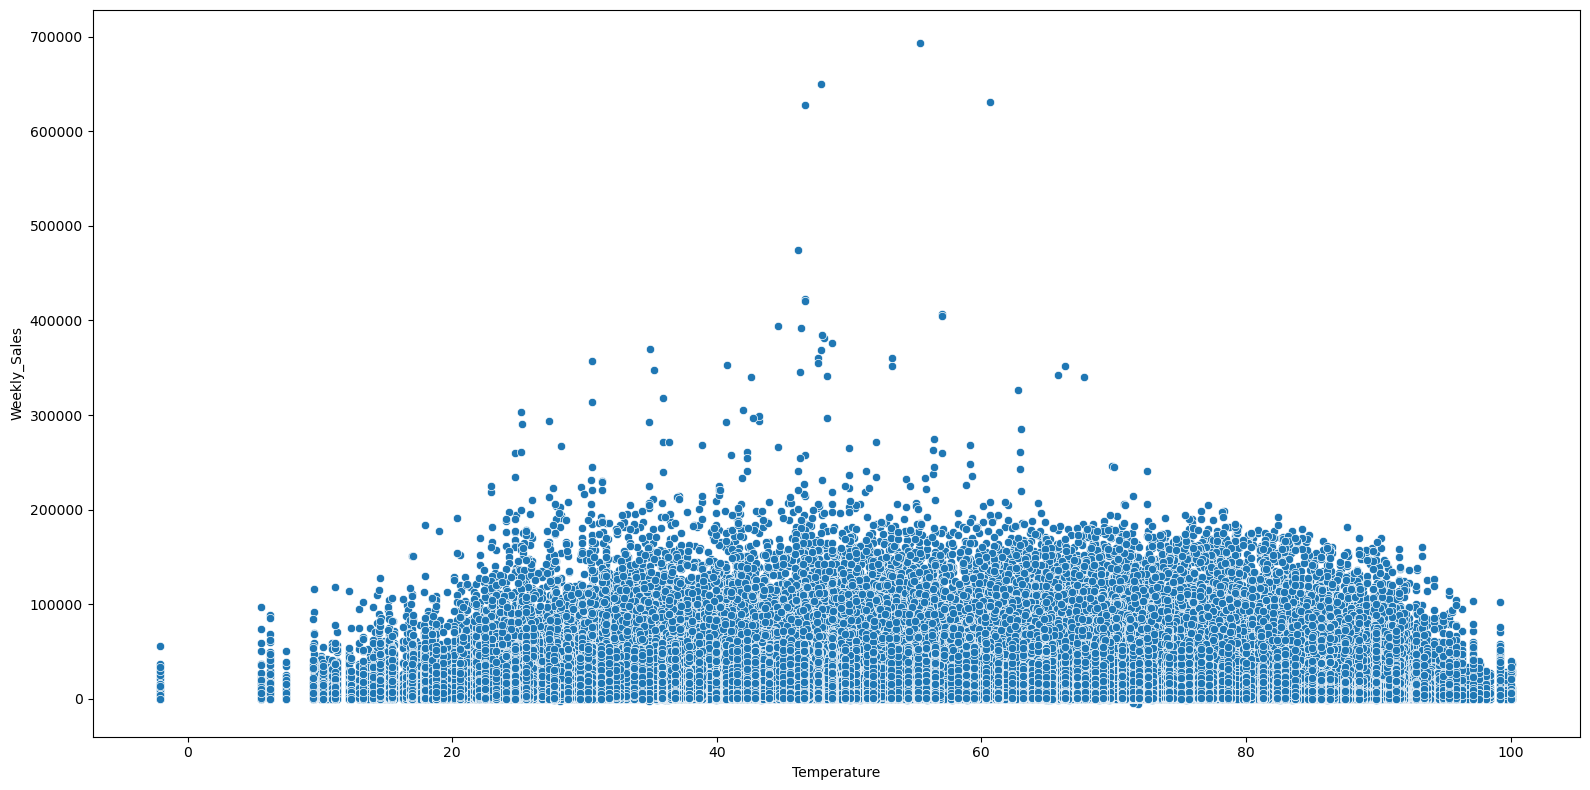

In [37]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=train_df["Temperature"],y=train_df["Weekly_Sales"])
plt.tight_layout()

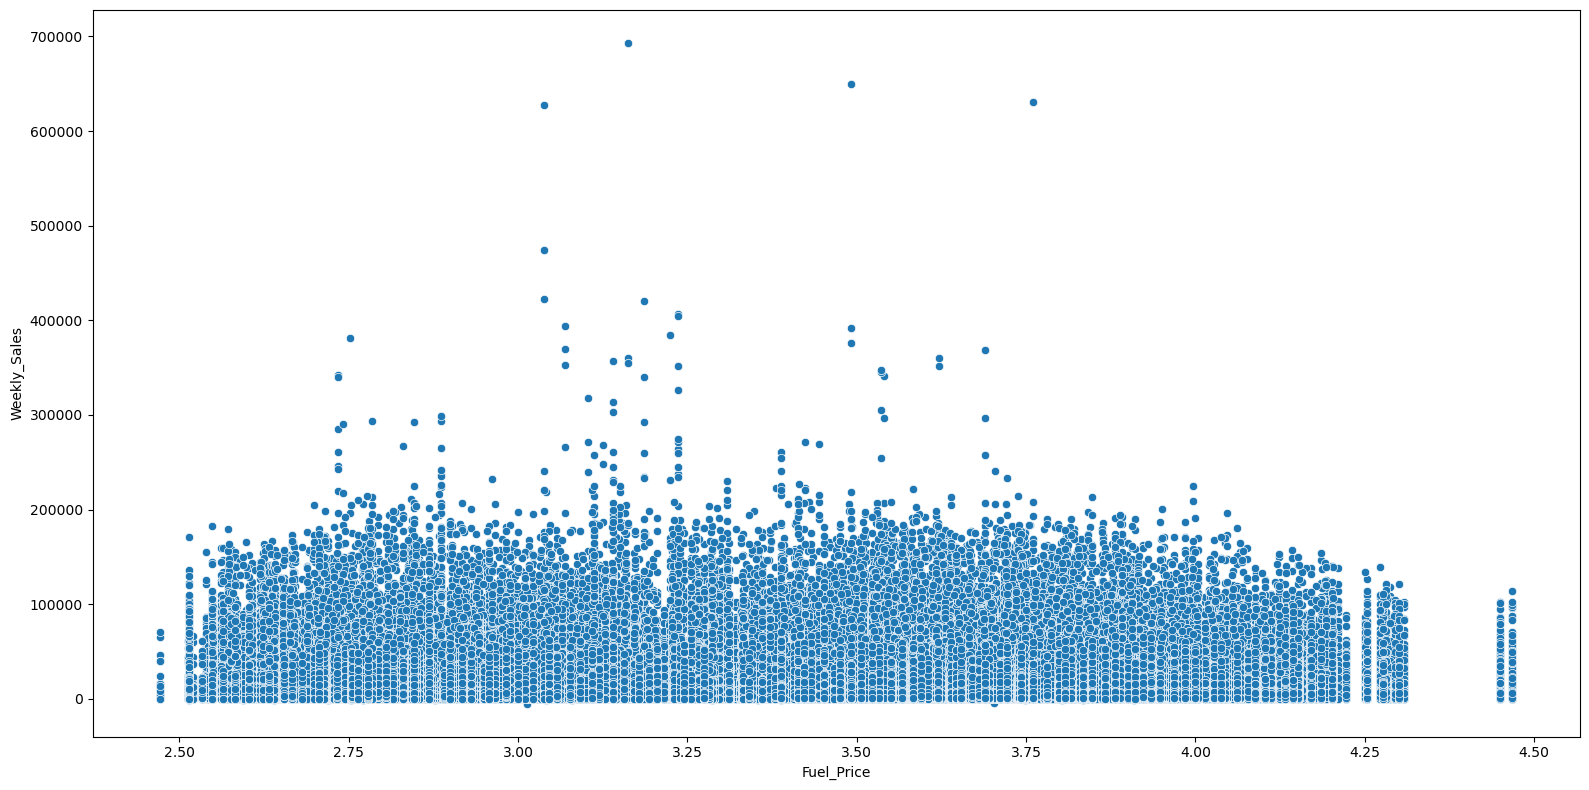

In [38]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=train_df["Fuel_Price"],y=train_df["Weekly_Sales"])
plt.tight_layout()

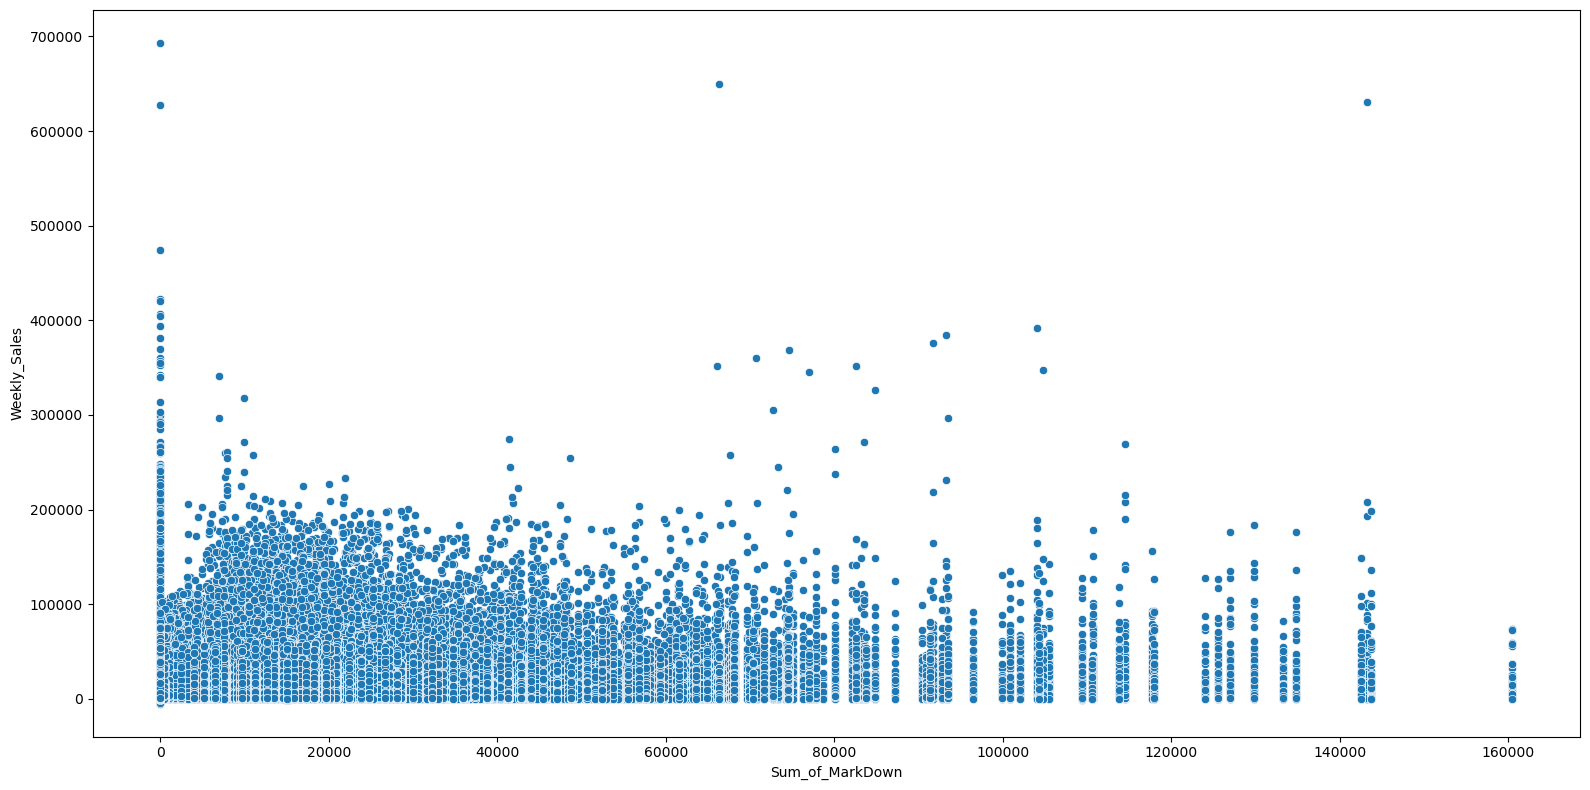

In [39]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=train_df["Sum_of_MarkDown"],y=train_df["Weekly_Sales"])
plt.tight_layout()

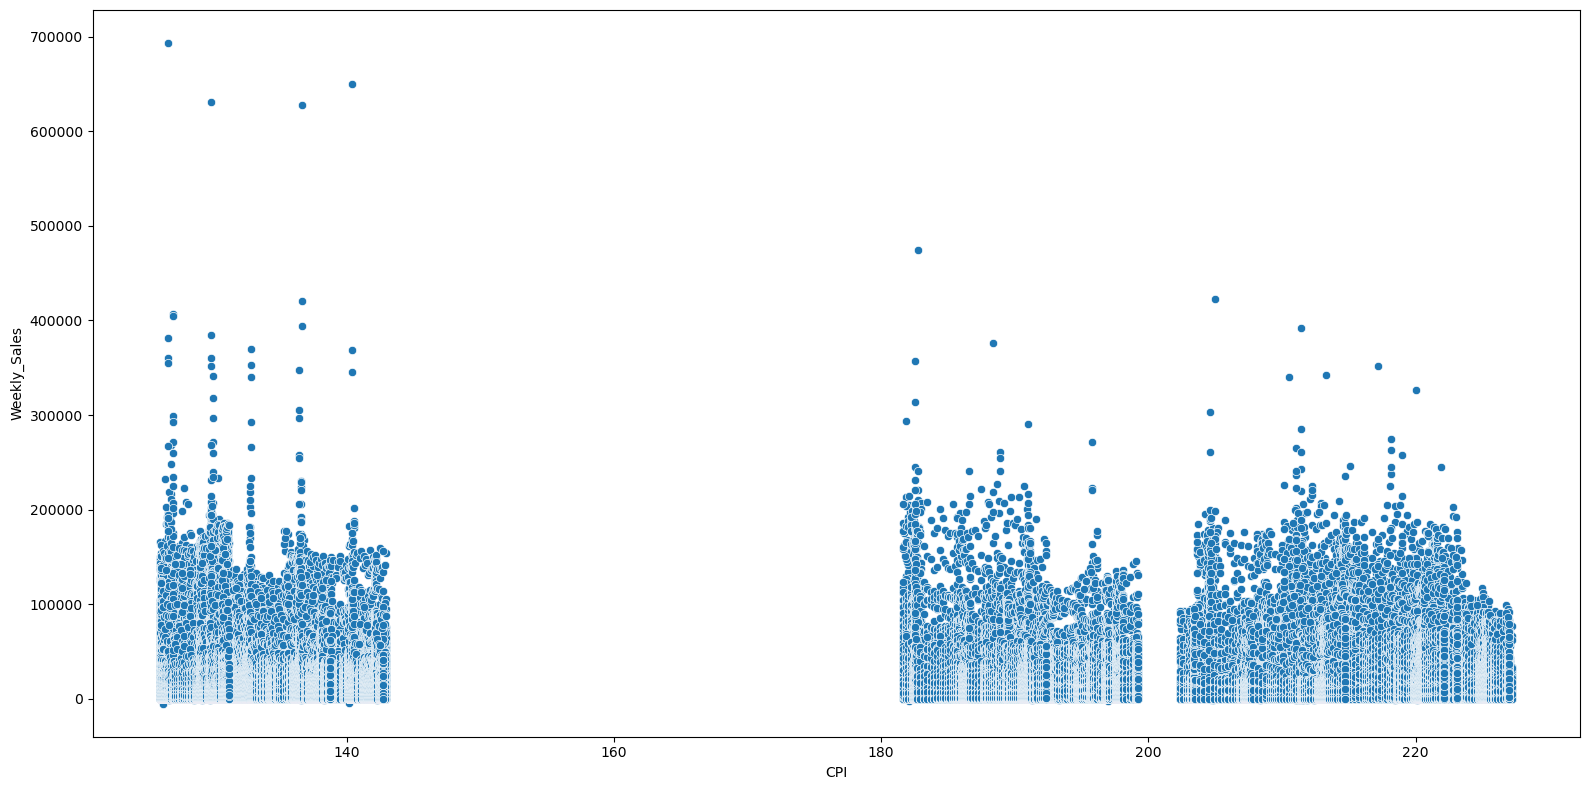

In [40]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=train_df["CPI"],y=train_df["Weekly_Sales"])
plt.tight_layout()

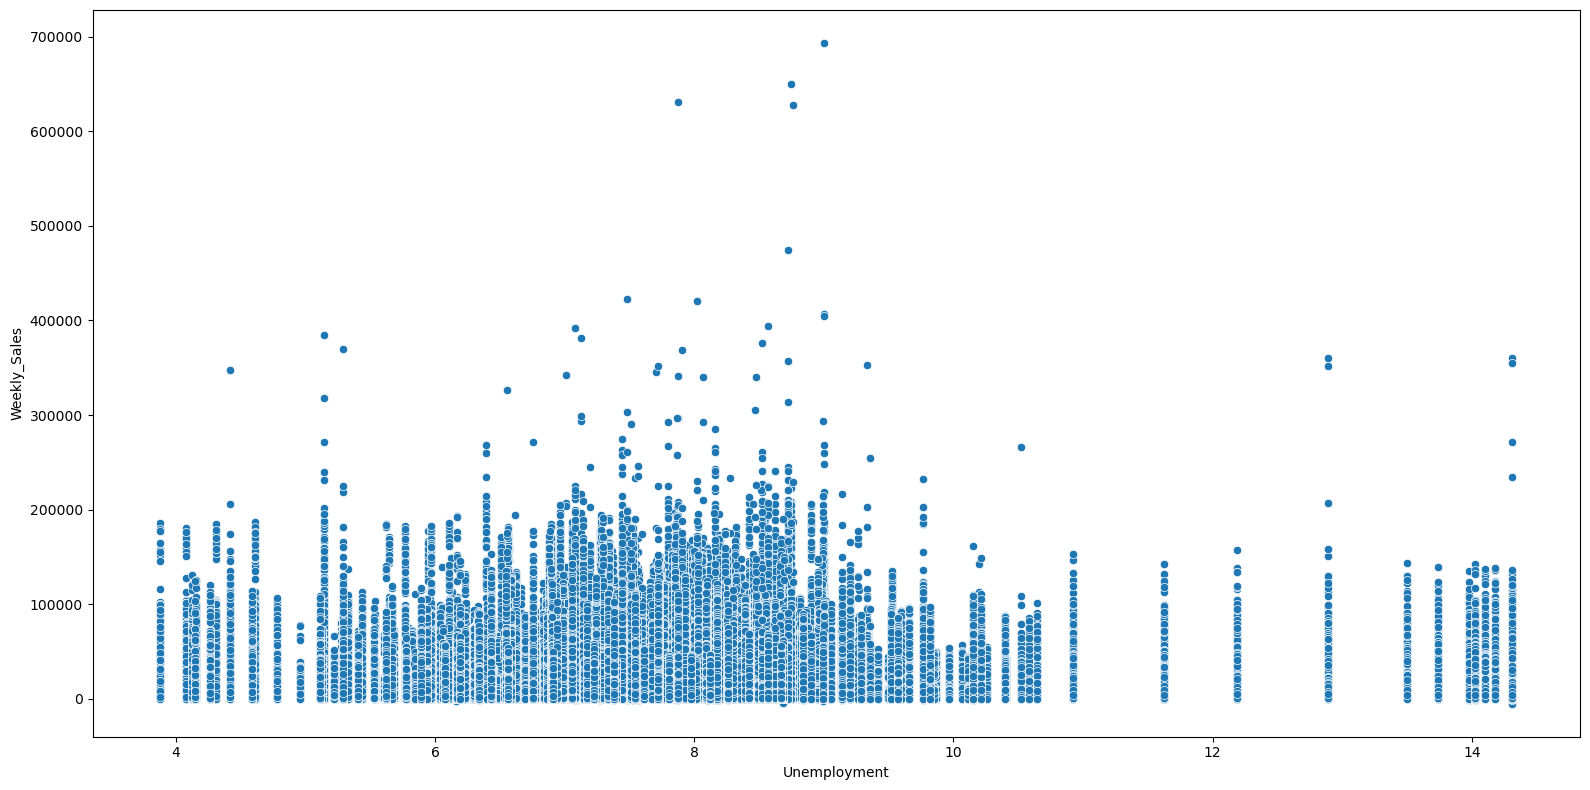

In [41]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=train_df["Unemployment"],y=train_df["Weekly_Sales"])
plt.tight_layout()

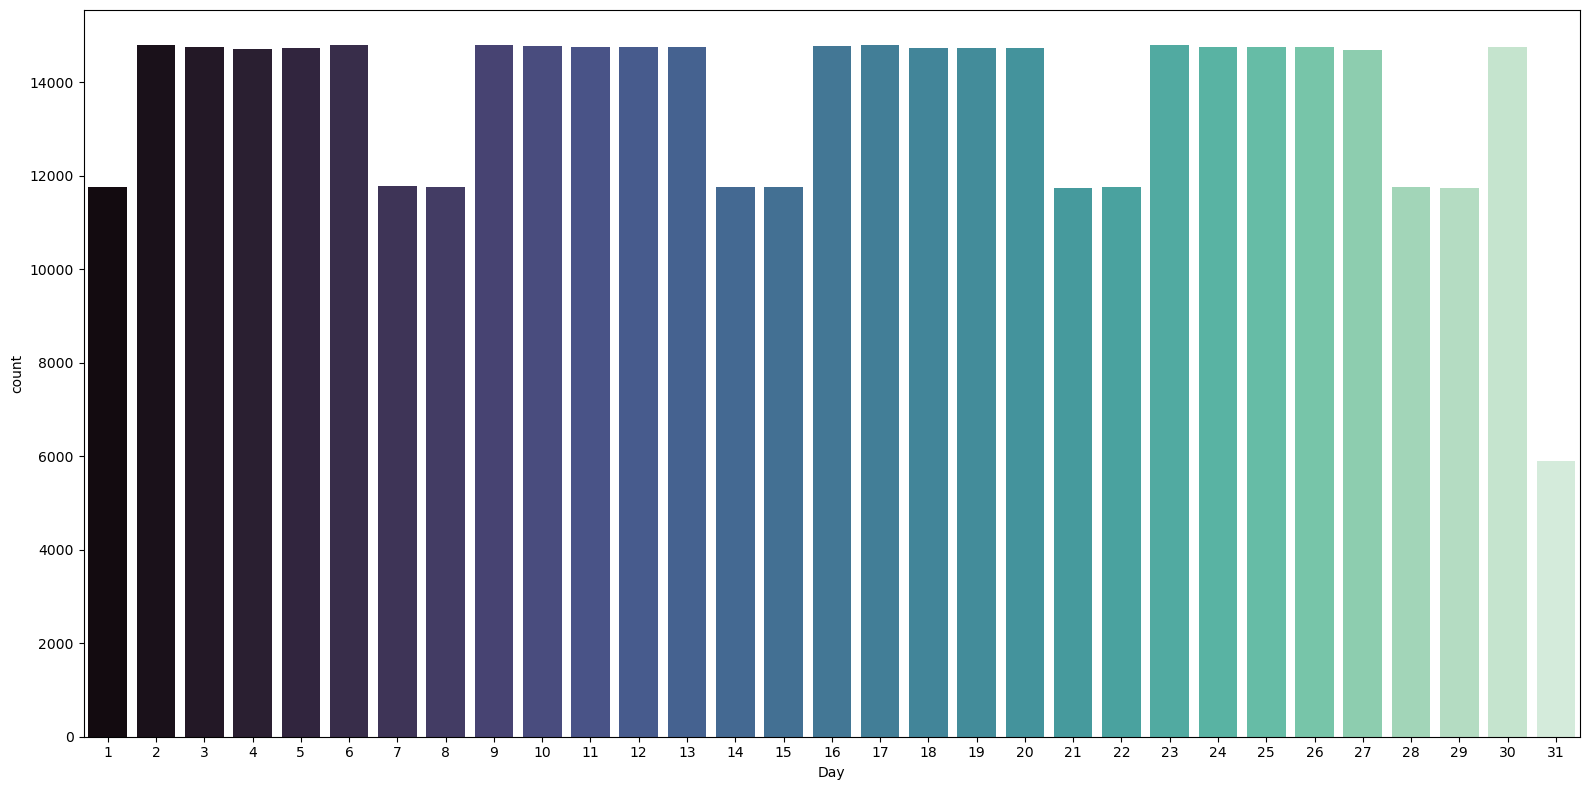

In [42]:
plt.figure(figsize=(16,8))
sns.countplot(x=train_df["Day"],palette="mako")
plt.tight_layout()

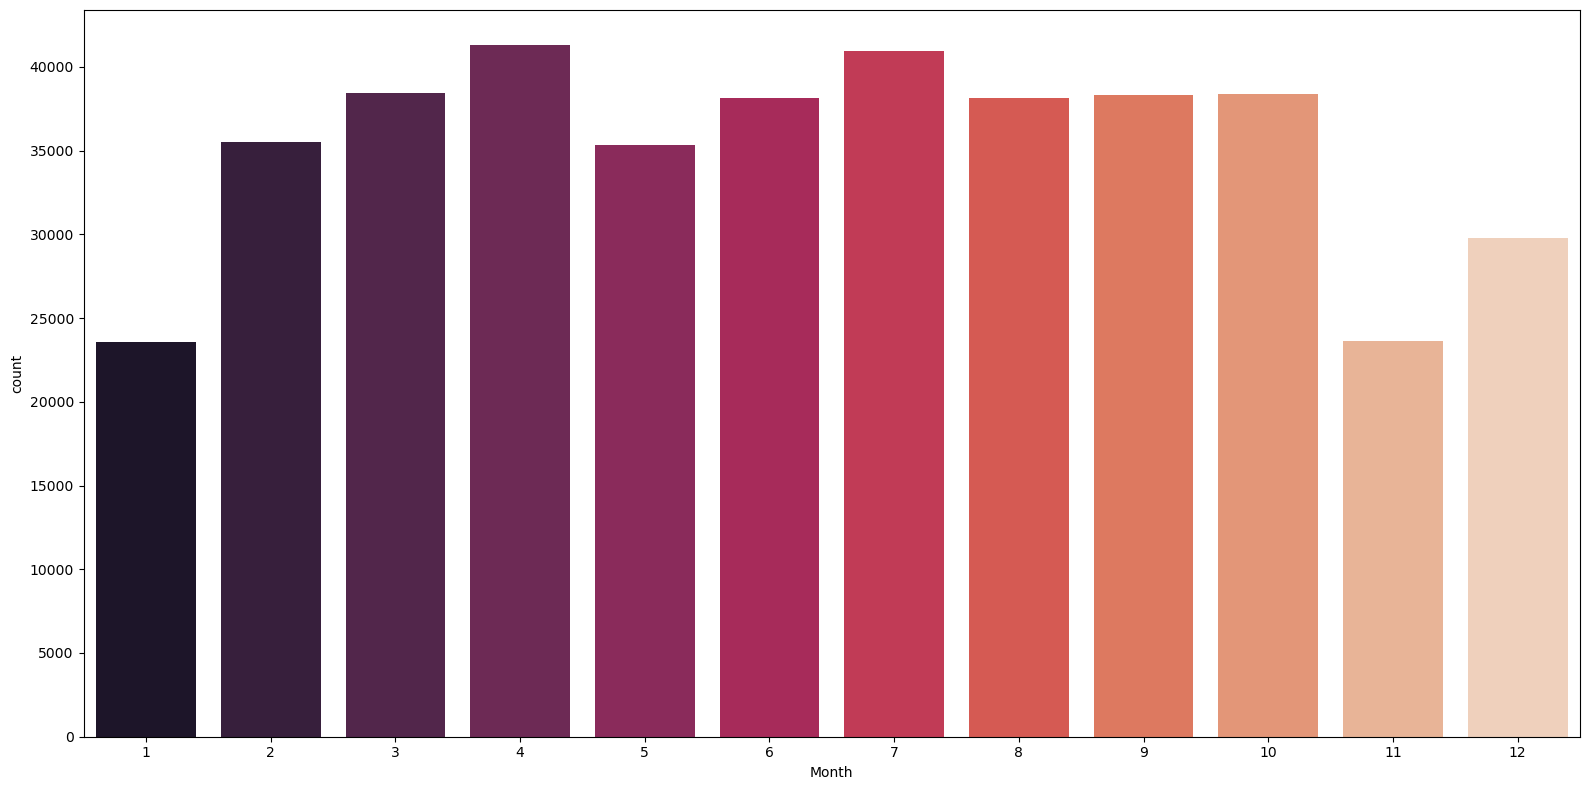

In [43]:
plt.figure(figsize=(16,8))
sns.countplot(x=train_df["Month"],palette="rocket")
plt.tight_layout()

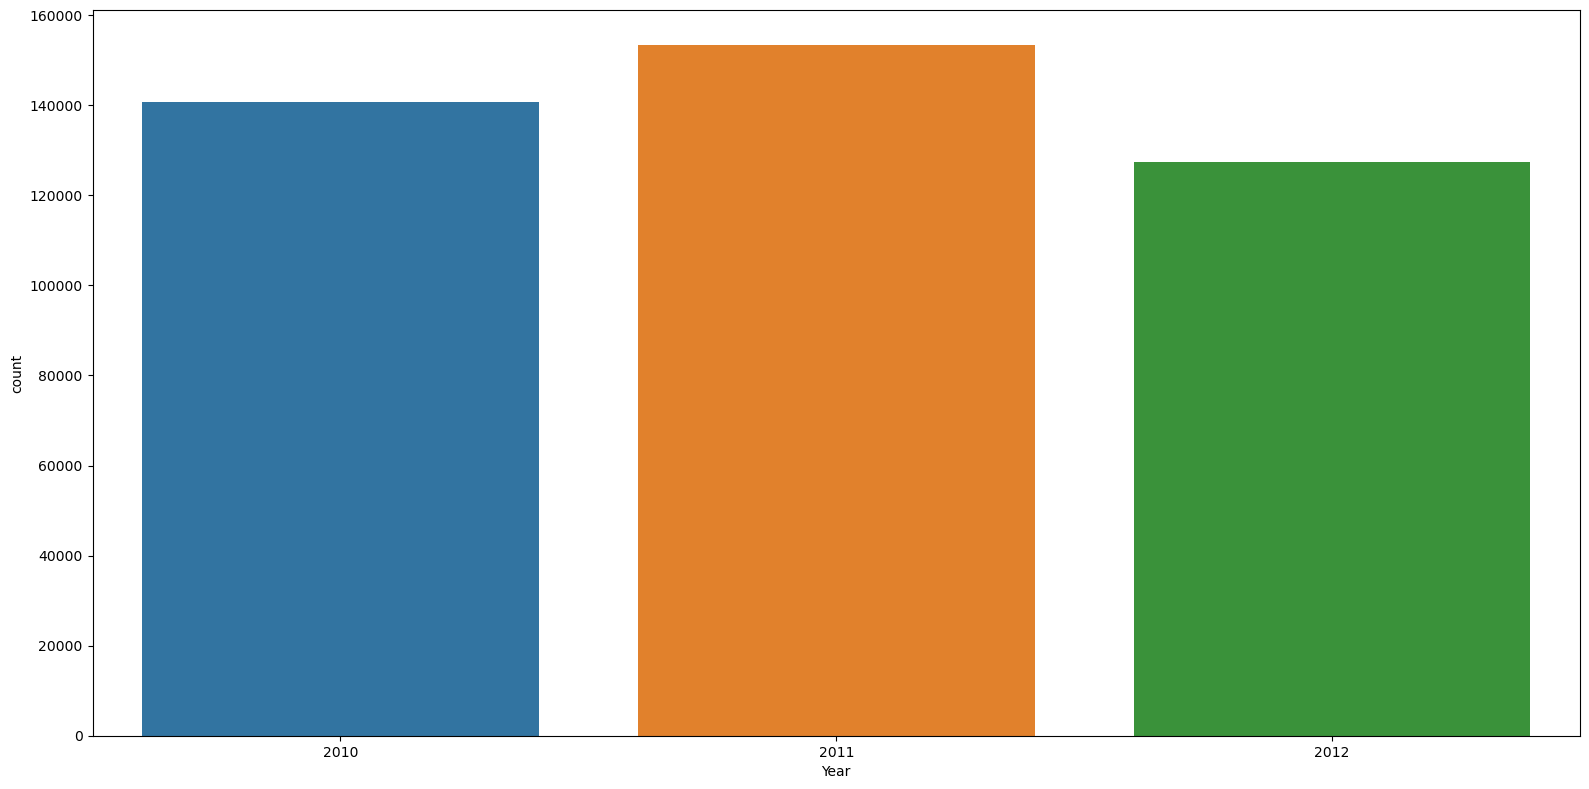

In [44]:
plt.figure(figsize=(16,8))
sns.countplot(x=train_df["Year"])
plt.tight_layout()

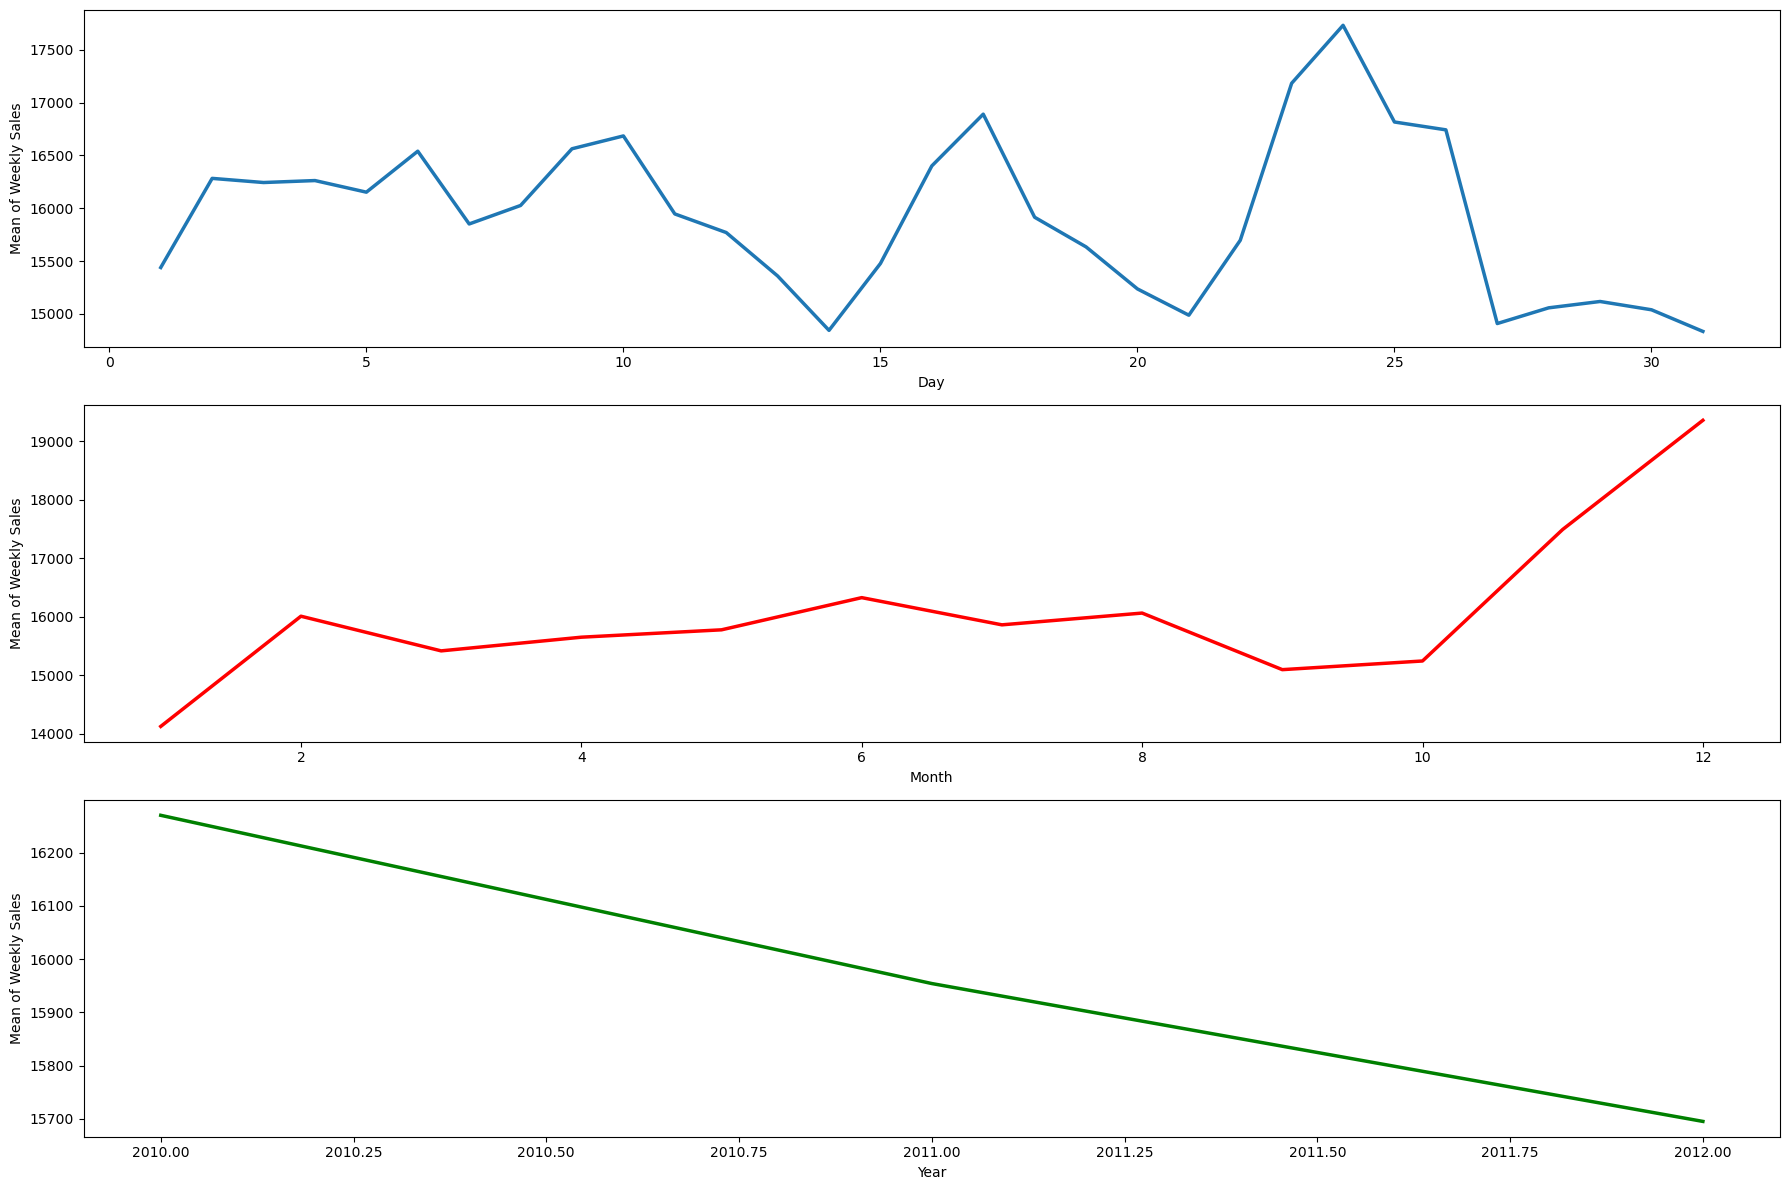

In [45]:
Day_df = train_df.groupby("Day")["Weekly_Sales"].mean().to_frame().reset_index()
Month_df = train_df.groupby("Month")["Weekly_Sales"].mean().to_frame().reset_index()
Year_df = train_df.groupby("Year")["Weekly_Sales"].mean().to_frame().reset_index()
fig , ax = plt.subplots(3,1,figsize = (18,12))
ax1 = sns.lineplot(x=Day_df["Day"],y=Day_df["Weekly_Sales"],linewidth=2.5,ax=ax[0])
ax1.set_ylabel("Mean of Weekly Sales")
ax2 = sns.lineplot(x=Month_df["Month"],y=Month_df["Weekly_Sales"],linewidth=2.5,ax=ax[1],color = "r")
ax2.set_ylabel("Mean of Weekly Sales")
ax3 = sns.lineplot(x=Year_df["Year"],y=Year_df["Weekly_Sales"],linewidth=2.5,ax=ax[2],color="g")
ax3.set_ylabel("Mean of Weekly Sales")
plt.tight_layout()

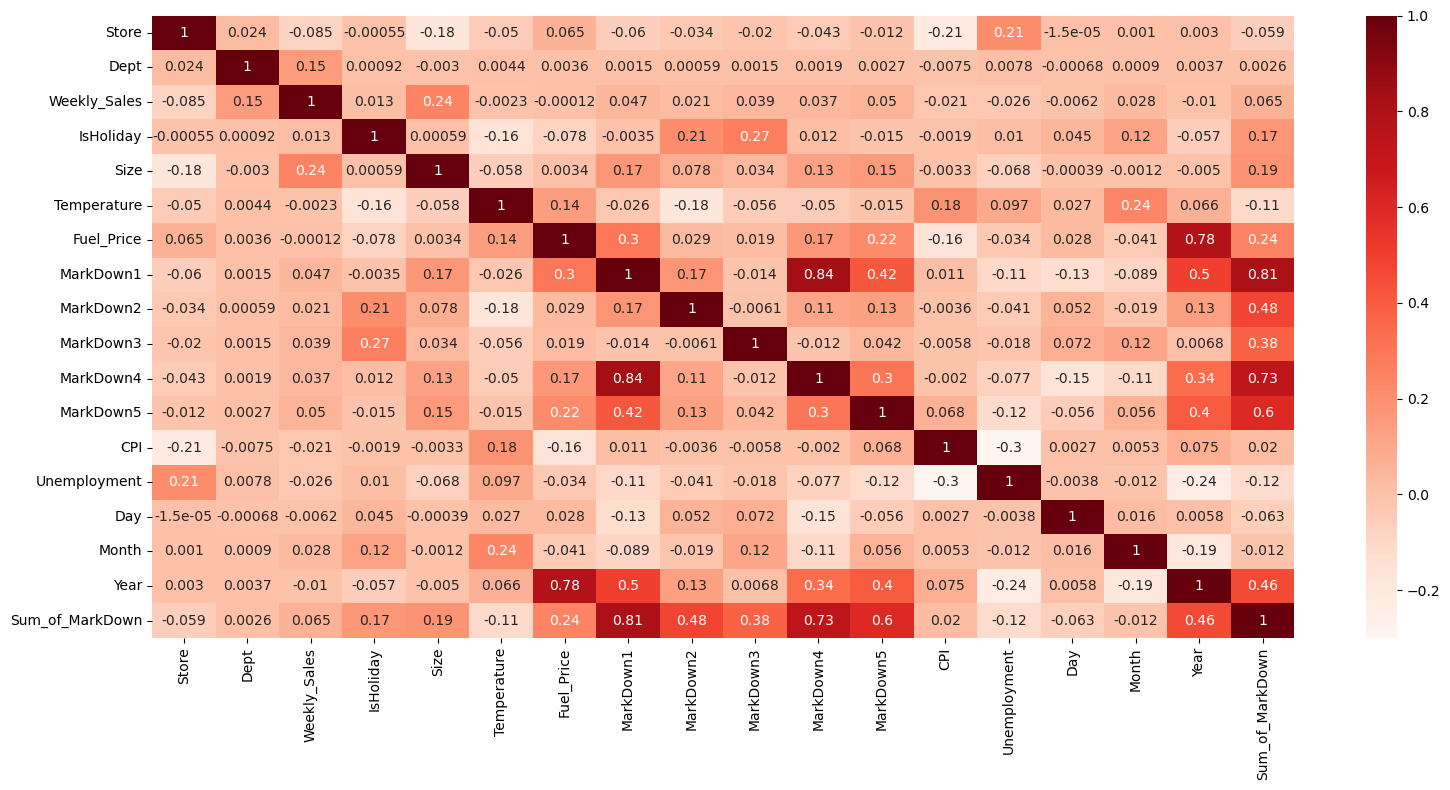

In [46]:
plt.figure(figsize=(16,8))
sns.heatmap(train_df.corr(),annot=True,cmap="Reds")
plt.tight_layout()

In [47]:
train_df.head()

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Day,Month,Year,Sum_of_MarkDown
0,1,1,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,5,2,2010,0.0
1,1,2,50605.27,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,5,2,2010,0.0
2,1,3,13740.12,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,5,2,2010,0.0
3,1,4,39954.04,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,5,2,2010,0.0
4,1,5,32229.38,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,5,2,2010,0.0


In [48]:
train_df.drop("Sum_of_MarkDown",axis=1,inplace=True)

In [49]:
Type_dummies = pd.get_dummies(train_df["Type"])
train_df = pd.concat([train_df,Type_dummies],axis=1)
train_df.drop("Type",axis=1,inplace=True)

In [50]:
train_df["IsHoliday"] = train_df["IsHoliday"].apply(lambda x: 1 if x==True else 0)

In [51]:
X = train_df.drop("Weekly_Sales",axis=1)
Y = train_df["Weekly_Sales"]

In [52]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

In [54]:
def RSE(y_true, y_predicted):
    y_true = np.array(y_true)
    y_predicted = np.array(y_predicted)
    RSS = np.sum(np.square(y_true - y_predicted))

    rse = sqrt(RSS / (len(y_true) - 2))
    return rse

In [55]:
models=[LinearRegression(),RandomForestRegressor(n_estimators=42),AdaBoostRegressor(),BaggingRegressor(),KNeighborsRegressor(),DecisionTreeRegressor()]
model_names=["LinearRegression","RandomForestRegressor","AdaBoostRegressor","BaggingRegressor","KNeighborsRegressor","DecisionTreeRegressor"]
MSE=[]
r_2=[]
RSE_ = []
accuracy = []
RMSE = []
d={}
for model in range (len(models)):
    model=models[model]
    model.fit(X_train,y_train)
    y_pre=model.predict(X_test)
    MSE.append(round(mean_squared_error(y_true=y_test,y_pred=y_pre),5))
    r_2.append(r2_score(y_true=y_test,y_pred=y_pre))
    RSE_.append(round(RSE(y_test,y_pre),5))
    accuracy.append((model.score(X_test,y_test))*100)
    RMSE.append(sqrt(mean_squared_error(y_true=y_test,y_pred=y_pre)))
d=pd.DataFrame({'Modelling Name':model_names,'MSE':MSE,"R_2":r_2,"RSE":RSE_,"Accuracy":accuracy,"RMSE":RMSE})


In [56]:
d

,Modelling Name,MSE,R_2,RSE,Accuracy,RMSE
0,LinearRegression,4.710804e+08,0.091173,21704.55715,9.117292,21704.385534
1,RandomForestRegressor,1.307069e+07,0.974784,3615.36928,97.478350,3615.340697
2,AdaBoostRegressor,5.876035e+08,-0.133628,24240.72679,-13.362828,24240.535116
3,BaggingRegressor,1.496692e+07,0.971125,3868.74098,97.112522,3868.710385
4,KNeighborsRegressor,4.114192e+08,0.206274,20283.63064,20.627367,20283.470262
5,DecisionTreeRegressor,2.552437e+07,0.950757,5052.20498,95.075736,5052.165033


In [57]:
model = RandomForestRegressor(n_estimators=42)
model.fit(X,Y)

RandomForestRegressor(n_estimators=42)

In [58]:
test_df.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
1,1,2,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
2,1,3,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
3,1,4,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
4,1,5,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573


In [59]:
test_df["Date"] = pd.to_datetime(test_df["Date"])
test_df["Day"] = test_df["Date"].dt.day
test_df["Month"] = test_df["Date"].dt.month
test_df["Year"] = test_df["Date"].dt.year
Date = test_df["Date"]
test_df.drop("Date",axis=1,inplace=True)

In [60]:
test_df["IsHoliday"] = test_df["IsHoliday"].apply(lambda x: 1 if x==True else 0)

In [61]:
Type_dummies2 = pd.get_dummies(test_df["Type"])
test_df = pd.concat([test_df,Type_dummies2],axis=1)
test_df.drop("Type",axis=1,inplace=True)

In [62]:
test_df["MarkDown1"] = test_df["MarkDown1"].replace(np.nan,0)
test_df["MarkDown2"] = test_df["MarkDown2"].replace(np.nan,0)
test_df["MarkDown3"] = test_df["MarkDown3"].replace(np.nan,0)
test_df["MarkDown4"] = test_df["MarkDown4"].replace(np.nan,0)
test_df["MarkDown5"] = test_df["MarkDown5"].replace(np.nan,0)
test_df["CPI"] = test_df["CPI"].replace(np.nan,test_df["CPI"].mean())
test_df["Unemployment"] = test_df["Unemployment"].replace(np.nan,test_df["Unemployment"].mean())

In [63]:
Predictions = pd.DataFrame(model.predict(test_df))

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [64]:
Predictions["Id"] = test_df["Store"].astype("str") + '_' + test_df["Dept"].astype("str") +"_" + Date.astype("str")

In [65]:
Predictions = Predictions.rename(columns = {0:"Weekly_Sales"})

In [66]:
Predictions = Predictions[["Id","Weekly_Sales"]]

In [67]:
Predictions

,Id,Weekly_Sales
0,1_1_2012-11-02,28576.194048
1,1_2_2012-11-02,11744.285714
2,1_3_2012-11-02,11744.285714
3,1_4_2012-11-02,11744.285714
4,1_5_2012-11-02,11744.285714
...,...,...
115059,45_93_2013-07-26,3920.476429
115060,45_94_2013-07-26,3920.476429
115061,45_95_2013-07-26,3920.476429
115062,45_97_2013-07-26,3920.476429


In [68]:
Predictions.to_csv("submission.csv",index=False)